<a href="https://colab.research.google.com/github/Nabilah03/clinical-pathology-dataset/blob/master/Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np 
import pandas as pd 
import os
df = pd.read_csv('menu.csv')

# GENERAL SUMMARY

In [35]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


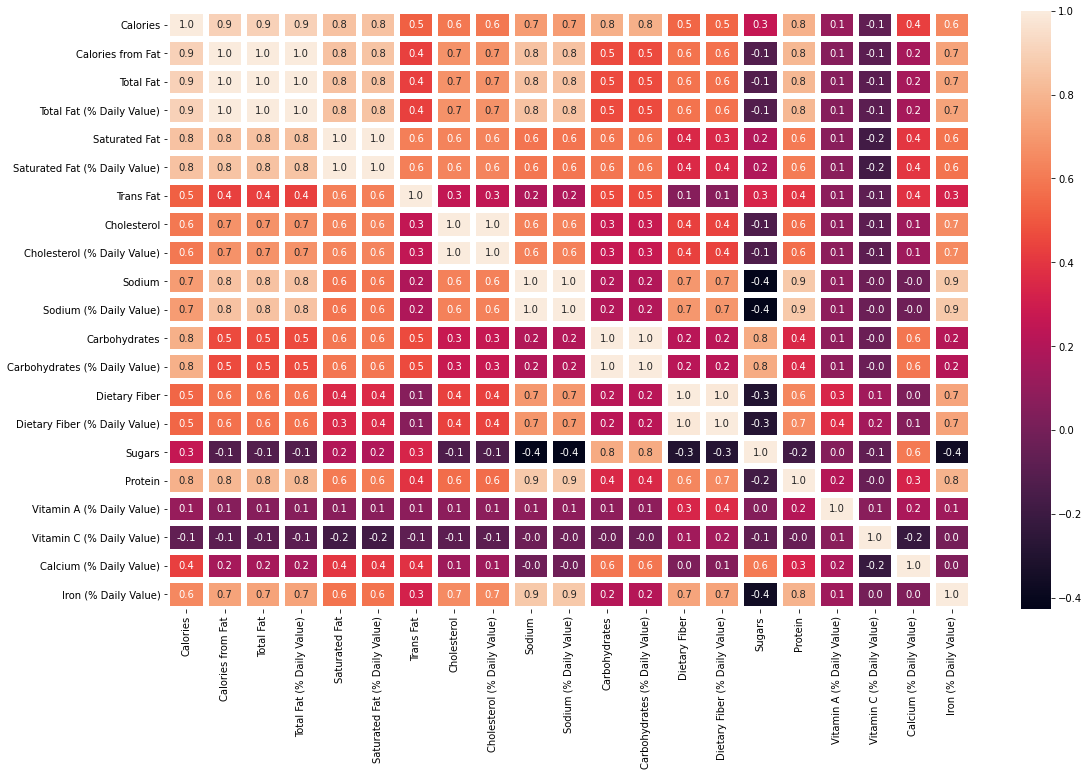

In [56]:
f,ax=plt.subplots(figsize=(18,11))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)


# Question 1
How many calories does the average McDonald's value meal contain?**

In [36]:
#Rata-Rata Kalori secara umum
print(df.Calories.mean())

368.2692307692308


In [37]:
print(df[['Category', 'Calories']] .groupby(["Category"]).mean())

                      Calories
Category                      
Beef & Pork         494.000000
Beverages           113.703704
Breakfast           526.666667
Chicken & Fish      552.962963
Coffee & Tea        283.894737
Desserts            222.142857
Salads              270.000000
Smoothies & Shakes  531.428571
Snacks & Sides      245.769231


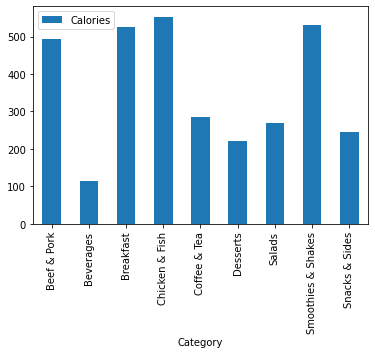

In [38]:
df_items = df[["Category", "Calories"]]
df_items.groupby("Category").mean().plot(kind="bar")

# Question 2 
How much do beverages,like soda or coffee, contribute to the overall caloric intake?** 

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
beverages = df.loc[df['Category'].isin(['Beverages','Coffee & Tea'])]
cat = beverages[['Category', 'Calories']] .groupby(["Category"],as_index=False).sum().sort_values('Calories')
cat

,Category,Calories
0,Beverages,3070
1,Coffee & Tea,26970


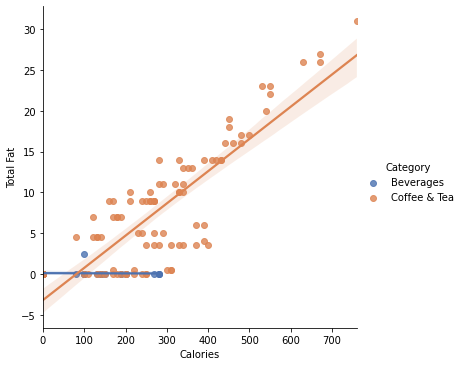

In [54]:
sns.lmplot(x="Calories", y="Total Fat", hue="Category", data=beverages, palette="deep")

# Question 3 
Does  ordered grilled chicken
instead of crispy increase a
sandwich's nutritional
value?**

In [41]:
df['Item'] = df['Item'].str.lower()
sandwich_df = df[df['Item'].str.contains('sandwich')]
grilled = sandwich_df[sandwich_df['Item'].str.contains('grilled chicken')]
crispy = sandwich_df[sandwich_df['Item'].str.contains('crispy')]

In [42]:
grilled.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.0,4.000000,4.000000,4.000000,4.0,4.000000,4.00
mean,475.000000,155.000000,17.250000,26.500000,5.375000,27.250000,0.0,92.500000,31.000000,1215.000000,50.500000,45.000000,15.000000,3.25,13.5,10.000000,36.000000,6.000000,19.5,22.500000,18.75
std,101.159939,64.549722,6.849574,11.120552,2.688711,14.773287,0.0,20.207259,6.683313,303.589635,12.714821,4.082483,1.414214,0.50,1.0,2.708013,5.656854,2.309401,9.0,8.660254,2.50
min,350.000000,80.000000,9.000000,13.000000,2.000000,9.000000,0.0,65.000000,22.000000,820.000000,34.000000,42.000000,14.000000,3.00,13.0,8.000000,28.000000,4.000000,8.0,15.000000,15.00
25%,425.000000,117.500000,13.500000,20.500000,3.875000,18.750000,0.0,83.750000,28.000000,1127.500000,46.750000,42.750000,14.000000,3.00,13.0,8.750000,34.000000,4.000000,17.0,15.000000,18.75
50%,480.000000,155.000000,17.500000,27.000000,5.750000,29.000000,0.0,97.500000,32.500000,1240.000000,51.500000,43.500000,14.500000,3.00,13.0,9.000000,38.000000,6.000000,20.0,22.500000,20.00
75%,530.000000,192.500000,21.250000,33.000000,7.250000,37.500000,0.0,106.250000,35.500000,1327.500000,55.250000,45.750000,15.500000,3.25,13.5,10.250000,40.000000,8.000000,22.5,30.000000,20.00
max,590.000000,230.000000,25.000000,39.000000,8.000000,42.000000,0.0,110.000000,37.000000,1560.000000,65.000000,51.000000,17.000000,4.00,15.0,14.000000,40.000000,8.000000,30.0,30.000000,20.00


In [ ]:
melted_df=pd.melt(frame=grilled,id_vars ='Item',value_vars=[
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)'])

In [ ]:
melted_df.pivot(index='Item',columns='variable',values='value')

In [77]:
grilled_av = grilled.mean()
a = grilled_av.to_frame()
b = a.transpose()
b['Type']='Grilled Chicken'
b

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Type
0,475.0,155.0,17.25,26.5,5.375,27.25,0.0,92.5,31.0,1215.0,50.5,45.0,15.0,3.25,13.5,10.0,36.0,6.0,19.5,22.5,18.75,Grilled Chicken


In [43]:
crispy.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,594.00000,252.000000,28.000000,43.000000,6.300000,31.800000,0.100000,67.00000,22.800000,1286.000000,53.600000,55.60000,18.400000,3.000000,12.400000,11.00000,29.800000,5.60000,14.600000,21.000000,18.000000
std,126.80694,69.785385,7.778175,12.409674,3.154362,15.738488,0.223607,21.38925,7.596052,333.811324,14.046352,7.98749,2.880972,0.707107,3.130495,3.24037,6.942622,2.19089,9.989995,8.215838,2.738613
min,430.00000,170.000000,19.000000,29.000000,3.000000,15.000000,0.000000,45.00000,14.000000,910.000000,38.000000,43.00000,14.000000,2.000000,7.000000,7.00000,21.000000,4.00000,2.000000,15.000000,15.000000
25%,510.00000,200.000000,22.000000,33.000000,3.500000,18.000000,0.000000,45.00000,16.000000,990.000000,41.000000,55.00000,18.000000,3.000000,13.000000,10.00000,24.000000,4.00000,6.000000,15.000000,15.000000
50%,610.00000,250.000000,28.000000,43.000000,6.000000,31.000000,0.000000,70.00000,24.000000,1400.000000,58.000000,57.00000,19.000000,3.000000,13.000000,11.00000,32.000000,4.00000,20.000000,15.000000,20.000000
75%,670.00000,300.000000,33.000000,51.000000,9.000000,44.000000,0.000000,85.00000,29.000000,1410.000000,59.000000,58.00000,19.000000,3.000000,14.000000,11.00000,36.000000,8.00000,20.000000,30.000000,20.000000
max,750.00000,340.000000,38.000000,59.000000,10.000000,51.000000,0.500000,90.00000,31.000000,1720.000000,72.000000,65.00000,22.000000,4.000000,15.000000,16.00000,36.000000,8.00000,25.000000,30.000000,20.000000


In [ ]:
melted_df1=pd.melt(frame=crispy,id_vars ='Item',value_vars=[
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)'])
melted_df1.pivot(index='Item',columns='variable',values='value')

In [81]:
crispy_av = crispy.mean()
c = crispy_av.to_frame()
d = c.transpose()
d['Type']='Crispy Chicken'
d

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Type
0,594.0,252.0,28.0,43.0,6.3,31.8,0.1,67.0,22.8,1286.0,53.6,55.6,18.4,3.0,12.4,11.0,29.8,5.6,14.6,21.0,18.0,Crispy Chicken


We can see the average of each nutrition values for grilled chicken and crispy chicken by looking at both of the information below. So, it conclude that cripsy chicken has higher sandwich's nutritional values than grilled chicken

In [82]:
frames = [b, d]
result = pd.concat(frames)
result

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Type
0,475.0,155.0,17.25,26.5,5.375,27.25,0.0,92.5,31.0,1215.0,50.5,45.0,15.0,3.25,13.5,10.0,36.0,6.0,19.5,22.5,18.75,Grilled Chicken
0,594.0,252.0,28.00,43.0,6.300,31.80,0.1,67.0,22.8,1286.0,53.6,55.6,18.4,3.00,12.4,11.0,29.8,5.6,14.6,21.0,18.00,Crispy Chicken


# Question 4
What about ordering egg
whites instead of whole
eggs?

We can see the average of each nutrition values for ordering egg whites and whole eggs by looking at both of the information below. So, it conclude that whole eggs has higher nutritional values than egg whites



In [44]:
df_egg = df[df['Item'].str.contains('egg')]
white_egg = df_egg[df_egg['Item'].str.contains('white')]
whole_egg = df_egg[~df_egg['Item'].str.contains('white')]

In [45]:
white_egg.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,565.384615,259.230769,28.846154,44.461538,11.153846,56.153846,0.038462,41.538462,13.692308,1433.846154,59.769231,53.076923,17.615385,3.461538,13.846154,7.615385,23.692308,3.538462,3.769231,17.000000,15.230769
std,231.142647,107.584195,12.061275,18.364891,3.738229,18.613822,0.138675,10.875166,3.945137,434.904941,18.125276,27.678095,9.251473,1.560736,6.375031,6.357915,6.183104,2.961289,4.867474,6.745369,7.061089
min,250.000000,70.000000,8.000000,12.000000,3.000000,15.000000,0.000000,25.000000,8.000000,770.000000,32.000000,30.000000,10.000000,2.000000,6.000000,2.000000,18.000000,0.000000,0.000000,8.000000,8.000000
25%,410.000000,210.000000,23.000000,35.000000,9.000000,45.000000,0.000000,35.000000,11.000000,1250.000000,52.000000,36.000000,12.000000,2.000000,9.000000,3.000000,20.000000,2.000000,0.000000,10.000000,10.000000
50%,500.000000,230.000000,26.000000,40.000000,12.000000,59.000000,0.000000,35.000000,12.000000,1320.000000,55.000000,46.000000,15.000000,3.000000,12.000000,4.000000,21.000000,4.000000,2.000000,15.000000,15.000000
75%,640.000000,330.000000,37.000000,57.000000,14.000000,69.000000,0.000000,50.000000,17.000000,1590.000000,66.000000,55.000000,18.000000,4.000000,17.000000,15.000000,26.000000,6.000000,8.000000,25.000000,15.000000
max,1050.000000,450.000000,50.000000,77.000000,16.000000,81.000000,0.500000,60.000000,20.000000,2290.000000,95.000000,115.000000,38.000000,7.000000,28.000000,18.000000,35.000000,10.000000,15.000000,25.000000,30.000000


In [46]:
whole_egg.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,506.666667,254.166667,28.333333,43.583333,11.750000,58.583333,0.333333,267.500000,89.250000,1230.000000,51.250000,41.500000,13.833333,2.833333,11.416667,5.583333,22.083333,12.583333,4.083333,20.416667,18.750000
std,96.703232,58.536443,6.705945,10.228821,3.107908,14.993686,0.536543,18.889632,6.426154,250.563002,10.480501,9.268716,3.186144,0.834847,4.033008,4.699291,5.212892,4.378840,5.017394,6.556861,3.768892
min,300.000000,120.000000,13.000000,20.000000,5.000000,25.000000,0.000000,250.000000,83.000000,750.000000,31.000000,30.000000,10.000000,2.000000,6.000000,2.000000,17.000000,6.000000,0.000000,10.000000,15.000000
25%,457.500000,225.000000,25.250000,39.000000,9.750000,50.500000,0.000000,250.000000,83.000000,1117.500000,46.750000,34.750000,11.500000,2.000000,8.750000,3.000000,18.750000,10.000000,0.000000,18.750000,15.000000
50%,515.000000,275.000000,30.500000,47.500000,12.500000,62.000000,0.000000,262.500000,88.000000,1290.000000,53.500000,40.000000,13.500000,3.000000,11.000000,3.000000,19.500000,10.000000,2.000000,20.000000,20.000000
75%,555.000000,290.000000,32.250000,49.250000,14.000000,68.750000,0.625000,281.250000,93.500000,1425.000000,59.500000,48.000000,16.000000,3.250000,13.250000,7.000000,25.250000,15.000000,8.000000,25.000000,20.000000
max,670.000000,330.000000,37.000000,57.000000,16.000000,78.000000,1.500000,300.000000,100.000000,1510.000000,63.000000,57.000000,19.000000,4.000000,18.000000,15.000000,33.000000,20.000000,15.000000,30.000000,25.000000


# Question 5
What is the least number of
items could you order from
the menu to meet one day's
nutritional requirements?